In [1]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

from sklearn.ensemble import RandomForestClassifier as RFC

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Import train & test data 
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
gender_submission = pd.read_csv('data/gender_submission.csv') # example of what a submission should look like

In [3]:
# View the training data
train.head()
#gender_submission.head

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


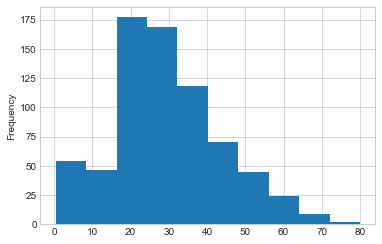

In [4]:
train.Age.plot.hist()

In [5]:
# View the test data (same columns as the training data)
test.head() # head = view first 5 lines

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# View the example submisison dataframe
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


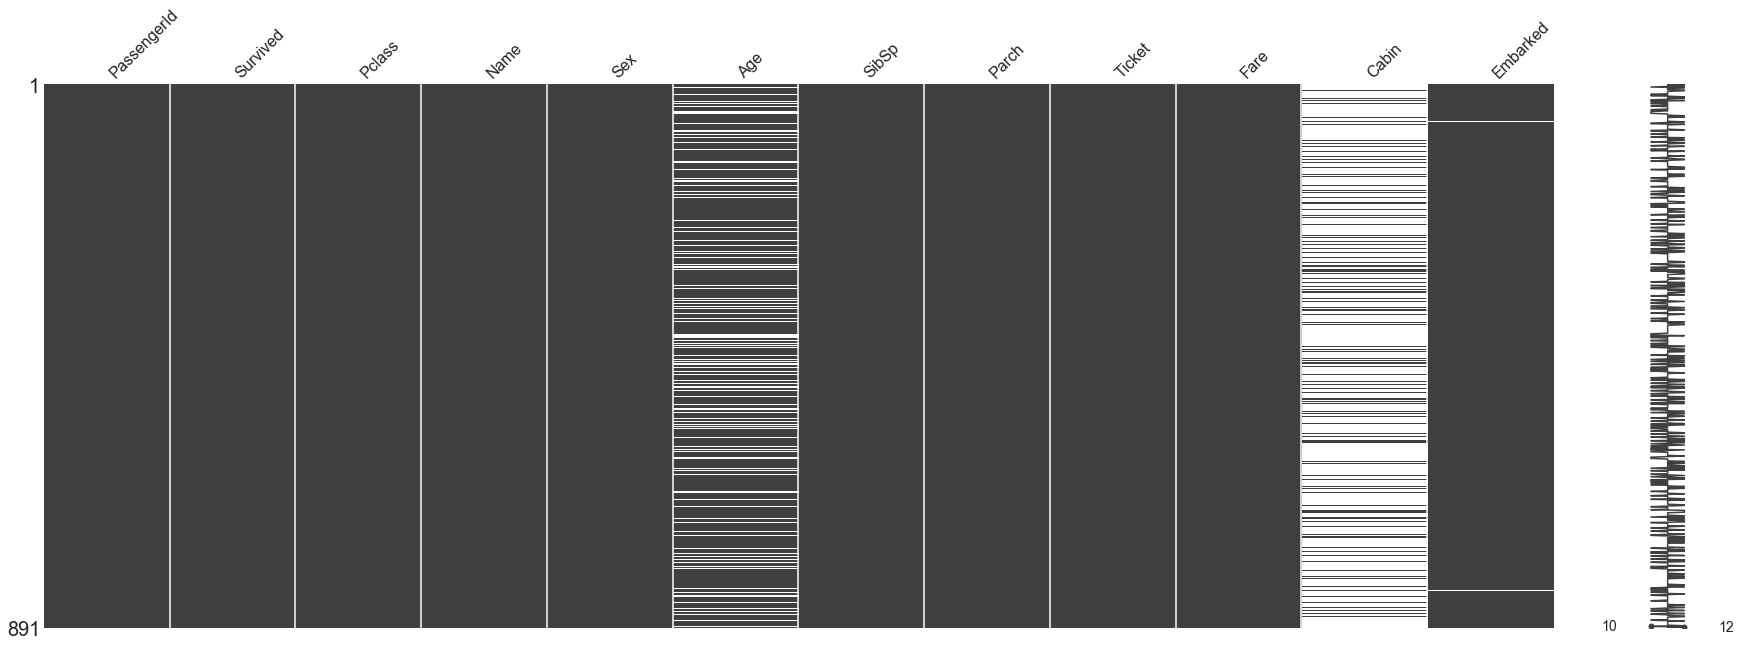

In [8]:
# Plot graphic of missing values
missingno.matrix(train, figsize = (30,10))

In [9]:
# Alternatively, you can see the number of missing values like this
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df_bin = pd.DataFrame() # for discretised continuous variables
df_con = pd.DataFrame() # for continuous variables

0    549
1    342
Name: Survived, dtype: int64


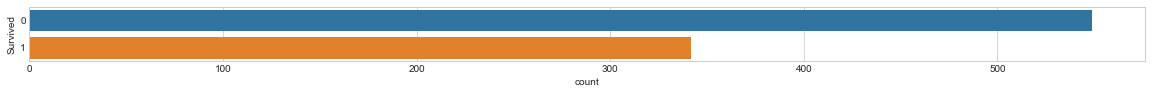

In [11]:
# How many people survived?
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Survived', data=train);
print(train.Survived.value_counts())

In [12]:
# Let's add this to our subset dataframes
df_bin['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']

In [13]:
df_bin['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']

In [14]:
# add Sex to the subset dataframes
df_bin['Sex'] = train['Sex']
df_bin['Sex'] = np.where(df_bin['Sex'] == 'female', 1, 0) # change sex to 0 for male and 1 for female

df_con['Sex'] = train['Sex']

In [15]:
df_bin.head()

,Survived,Pclass,Sex
0,0,3,0
1,1,1,1
2,1,3,1
3,1,1,1
4,0,3,0


In [16]:
df_con.head()

,Survived,Pclass,Sex
0,0,3,male
1,1,1,female
2,1,3,female
3,1,1,female
4,0,3,male


In [17]:
'''from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(train['Age'])
train['Age'] = imputer.transform(train['Age'])'''

"from sklearn.preprocessing import Imputer\nimputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)\nimputer = imputer.fit(train['Age'])\ntrain['Age'] = imputer.transform(train['Age'])"

In [18]:
# Add SibSp to subset dataframes
df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

In [19]:
# Add Parch to subset dataframes
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

In [20]:
# How many unique kinds of Ticket are there?
print("There are {} unique Ticket values.".format(len(train.Ticket.unique())))

There are 681 unique Ticket values.


In [21]:
# Add Fare to sub dataframes
df_con['Fare'] = train['Fare'] 
df_bin['Fare'] = pd.cut(train['Fare'], bins=5) # discretised

In [22]:
# Add Embarked to sub dataframes
df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']

# Remove Embarked rows which are missing values
print(len(df_con))
df_con = df_con.dropna(subset=['Embarked'])
df_bin = df_bin.dropna(subset=['Embarked'])
print(len(df_con))

891
889


In [23]:
# One-hot encode binned variables
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)

df_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [24]:
# One hot encode the categorical columns
df_embarked_one_hot = pd.get_dummies(df_con['Embarked'], 
                                     prefix='embarked')

df_sex_one_hot = pd.get_dummies(df_con['Sex'], 
                                prefix='sex')

df_plcass_one_hot = pd.get_dummies(df_con['Pclass'], 
                                   prefix='pclass')

In [25]:
# Combine the one hot encoded columns with df_con_enc
df_con_enc = pd.concat([df_con, 
                        df_embarked_one_hot, 
                        df_sex_one_hot, 
                        df_plcass_one_hot], axis=1)

# Drop the original categorical columns (because now they've been one hot encoded)
df_con_enc = df_con_enc.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [26]:
# Let's look at df_con_enc
df_con_enc.head(20)

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1
5,0,0,0,8.4583,0,1,0,0,1,0,0,1
6,0,0,0,51.8625,0,0,1,0,1,1,0,0
7,0,3,1,21.0750,0,0,1,0,1,0,0,1
8,1,0,2,11.1333,0,0,1,1,0,0,0,1
9,1,1,0,30.0708,1,0,0,1,0,0,1,0


In [27]:
# Seclect the dataframe we want to use first for predictions
selected_df = df_con_enc

In [28]:
# Split the dataframe into data and labels
X_train = selected_df.drop('Survived', axis=1) # data
y_train = selected_df.Survived # labels

In [29]:
X_train.shape

(889, 11)

In [30]:
y_train.shape

(889,)

In [31]:
X_train

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,13.0000,0,0,1,0,1,0,1,0
887,0,0,30.0000,0,0,1,1,0,1,0,0
888,1,2,23.4500,0,0,1,1,0,0,0,1
889,0,0,30.0000,1,0,0,0,1,1,0,0


In [32]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

In [33]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 79.98
Accuracy CV 10-Fold: 79.42
Running Time: 0:00:19.298980


In [34]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 83.46
Accuracy CV 10-Fold: 76.72
Running Time: 0:00:00.203456


In [35]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 78.52
Accuracy CV 10-Fold: 77.95
Running Time: 0:00:00.279251


In [36]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 73.79
Accuracy CV 10-Fold: 77.5
Running Time: 0:00:00.917545


In [37]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 76.6
Accuracy CV 10-Fold: 70.3
Running Time: 0:00:00.084773


In [38]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 92.46
Accuracy CV 10-Fold: 80.31
Running Time: 0:00:00.205442


In [39]:
# Random Forest Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(RFC(n_estimators=100), 
                                               X_train, 
                                               y_train,
                                               10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 92.46
Accuracy CV 10-Fold: 79.42
Running Time: 0:00:02.993572


In [40]:
# Define the categorical features for the CatBoost model
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [41]:
# Use the CatBoost Pool() function to pool together the training data and categorical feature labels
train_pool = Pool(X_train, 
                  y_train,
                  cat_features)

In [42]:
# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.016206
0:	learn: 0.6819672	total: 166ms	remaining: 2m 45s
1:	learn: 0.6733233	total: 251ms	remaining: 2m 5s
2:	learn: 0.6644361	total: 355ms	remaining: 1m 57s
3:	learn: 0.6579933	total: 422ms	remaining: 1m 45s
4:	learn: 0.6510365	total: 535ms	remaining: 1m 46s
5:	learn: 0.6437724	total: 658ms	remaining: 1m 49s
6:	learn: 0.6361234	total: 777ms	remaining: 1m 50s
7:	learn: 0.6287414	total: 877ms	remaining: 1m 48s
8:	learn: 0.6225296	total: 995ms	remaining: 1m 49s
9:	learn: 0.6156731	total: 1.06s	remaining: 1m 45s
10:	learn: 0.6108103	total: 1.14s	remaining: 1m 42s
11:	learn: 0.6059891	total: 1.2s	remaining: 1m 38s
12:	learn: 0.6001439	total: 1.3s	remaining: 1m 38s
13:	learn: 0.5944909	total: 1.36s	remaining: 1m 35s
14:	learn: 0.5904032	total: 1.41s	remaining: 1m 32s
15:	learn: 0.5848058	total: 1.48s	remaining: 1m 31s
16:	learn: 0.5808906	total: 1.54s	remaining: 1m 28s
17:	learn: 0.5752290	total: 1.65s	remaining: 1m 29s
18:	learn: 0.5693099	total: 1.78s	remaining: 1m

160:	learn: 0.4236277	total: 13s	remaining: 1m 7s
161:	learn: 0.4236240	total: 13s	remaining: 1m 7s
162:	learn: 0.4234728	total: 13.1s	remaining: 1m 7s
163:	learn: 0.4234694	total: 13.1s	remaining: 1m 6s
164:	learn: 0.4233732	total: 13.2s	remaining: 1m 6s
165:	learn: 0.4231964	total: 13.3s	remaining: 1m 6s
166:	learn: 0.4228202	total: 13.4s	remaining: 1m 6s
167:	learn: 0.4227483	total: 13.4s	remaining: 1m 6s
168:	learn: 0.4226278	total: 13.5s	remaining: 1m 6s
169:	learn: 0.4223626	total: 13.7s	remaining: 1m 6s
170:	learn: 0.4219142	total: 13.8s	remaining: 1m 6s
171:	learn: 0.4216732	total: 13.9s	remaining: 1m 6s
172:	learn: 0.4211847	total: 14s	remaining: 1m 6s
173:	learn: 0.4211204	total: 14.1s	remaining: 1m 6s
174:	learn: 0.4208905	total: 14.1s	remaining: 1m 6s
175:	learn: 0.4207324	total: 14.2s	remaining: 1m 6s
176:	learn: 0.4200304	total: 14.2s	remaining: 1m 6s
177:	learn: 0.4199646	total: 14.2s	remaining: 1m 5s
178:	learn: 0.4199609	total: 14.3s	remaining: 1m 5s
179:	learn: 0.4197

321:	learn: 0.4051488	total: 23.4s	remaining: 49.2s
322:	learn: 0.4051193	total: 23.5s	remaining: 49.2s
323:	learn: 0.4051183	total: 23.6s	remaining: 49.2s
324:	learn: 0.4050893	total: 23.6s	remaining: 49.1s
325:	learn: 0.4050081	total: 23.7s	remaining: 49.1s
326:	learn: 0.4049714	total: 23.8s	remaining: 49s
327:	learn: 0.4049526	total: 23.9s	remaining: 49s
328:	learn: 0.4049294	total: 23.9s	remaining: 48.8s
329:	learn: 0.4049294	total: 24s	remaining: 48.6s
330:	learn: 0.4049270	total: 24s	remaining: 48.5s
331:	learn: 0.4049046	total: 24.1s	remaining: 48.4s
332:	learn: 0.4048084	total: 24.2s	remaining: 48.4s
333:	learn: 0.4046252	total: 24.2s	remaining: 48.3s
334:	learn: 0.4045831	total: 24.3s	remaining: 48.2s
335:	learn: 0.4045003	total: 24.4s	remaining: 48.2s
336:	learn: 0.4044987	total: 24.4s	remaining: 48s
337:	learn: 0.4044609	total: 24.5s	remaining: 48s
338:	learn: 0.4043827	total: 24.5s	remaining: 47.9s
339:	learn: 0.4043713	total: 24.6s	remaining: 47.7s
340:	learn: 0.4043705	to

480:	learn: 0.3930199	total: 35.7s	remaining: 38.6s
481:	learn: 0.3929500	total: 35.8s	remaining: 38.5s
482:	learn: 0.3929388	total: 35.9s	remaining: 38.4s
483:	learn: 0.3929087	total: 36s	remaining: 38.4s
484:	learn: 0.3928711	total: 36.1s	remaining: 38.3s
485:	learn: 0.3927442	total: 36.1s	remaining: 38.2s
486:	learn: 0.3926409	total: 36.3s	remaining: 38.2s
487:	learn: 0.3926029	total: 36.4s	remaining: 38.2s
488:	learn: 0.3926010	total: 36.5s	remaining: 38.1s
489:	learn: 0.3925867	total: 36.5s	remaining: 38s
490:	learn: 0.3925528	total: 36.6s	remaining: 38s
491:	learn: 0.3925262	total: 36.7s	remaining: 37.9s
492:	learn: 0.3924789	total: 36.8s	remaining: 37.8s
493:	learn: 0.3922437	total: 36.9s	remaining: 37.8s
494:	learn: 0.3921897	total: 37s	remaining: 37.7s
495:	learn: 0.3920551	total: 37.1s	remaining: 37.7s
496:	learn: 0.3919488	total: 37.2s	remaining: 37.6s
497:	learn: 0.3919393	total: 37.3s	remaining: 37.6s
498:	learn: 0.3919119	total: 37.3s	remaining: 37.5s
499:	learn: 0.391857

641:	learn: 0.3796570	total: 48.9s	remaining: 27.3s
642:	learn: 0.3796304	total: 49s	remaining: 27.2s
643:	learn: 0.3795884	total: 49.1s	remaining: 27.1s
644:	learn: 0.3794688	total: 49.2s	remaining: 27.1s
645:	learn: 0.3792999	total: 49.3s	remaining: 27s
646:	learn: 0.3792987	total: 49.3s	remaining: 26.9s
647:	learn: 0.3792758	total: 49.4s	remaining: 26.8s
648:	learn: 0.3790024	total: 49.4s	remaining: 26.7s
649:	learn: 0.3788056	total: 49.5s	remaining: 26.6s
650:	learn: 0.3787288	total: 49.5s	remaining: 26.5s
651:	learn: 0.3785641	total: 49.5s	remaining: 26.4s
652:	learn: 0.3785043	total: 49.6s	remaining: 26.3s
653:	learn: 0.3784948	total: 49.6s	remaining: 26.2s
654:	learn: 0.3780631	total: 49.7s	remaining: 26.2s
655:	learn: 0.3778936	total: 49.7s	remaining: 26.1s
656:	learn: 0.3778800	total: 49.7s	remaining: 26s
657:	learn: 0.3777381	total: 49.8s	remaining: 25.9s
658:	learn: 0.3774266	total: 49.9s	remaining: 25.8s
659:	learn: 0.3774064	total: 50s	remaining: 25.8s
660:	learn: 0.377371

802:	learn: 0.3643911	total: 1m 4s	remaining: 15.8s
803:	learn: 0.3643874	total: 1m 4s	remaining: 15.7s
804:	learn: 0.3643773	total: 1m 4s	remaining: 15.6s
805:	learn: 0.3643555	total: 1m 4s	remaining: 15.5s
806:	learn: 0.3641695	total: 1m 4s	remaining: 15.5s
807:	learn: 0.3641072	total: 1m 4s	remaining: 15.4s
808:	learn: 0.3641016	total: 1m 4s	remaining: 15.3s
809:	learn: 0.3640029	total: 1m 5s	remaining: 15.3s
810:	learn: 0.3639852	total: 1m 5s	remaining: 15.2s
811:	learn: 0.3639798	total: 1m 5s	remaining: 15.1s
812:	learn: 0.3638781	total: 1m 5s	remaining: 15s
813:	learn: 0.3638173	total: 1m 5s	remaining: 15s
814:	learn: 0.3638112	total: 1m 5s	remaining: 14.9s
815:	learn: 0.3638098	total: 1m 5s	remaining: 14.8s
816:	learn: 0.3635968	total: 1m 5s	remaining: 14.7s
817:	learn: 0.3635825	total: 1m 5s	remaining: 14.6s
818:	learn: 0.3635220	total: 1m 5s	remaining: 14.6s
819:	learn: 0.3635039	total: 1m 6s	remaining: 14.5s
820:	learn: 0.3634785	total: 1m 6s	remaining: 14.4s
821:	learn: 0.36

960:	learn: 0.3555613	total: 1m 19s	remaining: 3.23s
961:	learn: 0.3554016	total: 1m 19s	remaining: 3.15s
962:	learn: 0.3553038	total: 1m 19s	remaining: 3.07s
963:	learn: 0.3553031	total: 1m 19s	remaining: 2.98s
964:	learn: 0.3551722	total: 1m 20s	remaining: 2.9s
965:	learn: 0.3551722	total: 1m 20s	remaining: 2.82s
966:	learn: 0.3551506	total: 1m 20s	remaining: 2.74s
967:	learn: 0.3551281	total: 1m 20s	remaining: 2.65s
968:	learn: 0.3551281	total: 1m 20s	remaining: 2.57s
969:	learn: 0.3550854	total: 1m 20s	remaining: 2.49s
970:	learn: 0.3550773	total: 1m 20s	remaining: 2.4s
971:	learn: 0.3550714	total: 1m 20s	remaining: 2.32s
972:	learn: 0.3550709	total: 1m 20s	remaining: 2.24s
973:	learn: 0.3550479	total: 1m 20s	remaining: 2.16s
974:	learn: 0.3549913	total: 1m 20s	remaining: 2.07s
975:	learn: 0.3549764	total: 1m 21s	remaining: 1.99s
976:	learn: 0.3549577	total: 1m 21s	remaining: 1.91s
977:	learn: 0.3549370	total: 1m 21s	remaining: 1.83s
978:	learn: 0.3549063	total: 1m 21s	remaining: 1

In [43]:
# How long will this take?
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6742326	test: 0.6749158	best: 0.6749158 (0)	total: 3.36s	remaining: 55m 54s
1:	learn: 0.6570186	test: 0.6583027	best: 0.6583027 (1)	total: 6.52s	remaining: 54m 15s
2:	learn: 0.6438396	test: 0.6454877	best: 0.6454877 (2)	total: 9.63s	remaining: 53m 19s
3:	learn: 0.6290348	test: 0.6313304	best: 0.6313304 (3)	total: 12.8s	remaining: 53m 3s
4:	learn: 0.6167356	test: 0.6195984	best: 0.6195984 (4)	total: 15.9s	remaining: 52m 52s
5:	learn: 0.6058784	test: 0.6093648	best: 0.6093648 (5)	total: 19.1s	remaining: 52m 36s
6:	learn: 0.5952122	test: 0.5992436	best: 0.5992436 (6)	total: 22.3s	remaining: 52m 42s
7:	learn: 0.5857593	test: 0.5898595	best: 0.5898595 (7)	total: 25.4s	remaining: 52m 27s
8:	learn: 0.5761870	test: 0.5808184	best: 0.5808184 (8)	total: 28.4s	remaining: 52m 7s
9:	learn: 0.5674552	test: 0.5725333	best: 0.5725333 (9)	total: 31.6s	remaining: 52m 10s
10:	learn: 0.5596425	test: 0.5648844	best: 0.5648844 (10)	total: 34.6s	remaining: 51m 52s
11:	learn: 0.5525810	test: 0.558

91:	learn: 0.4204716	test: 0.4483298	best: 0.4483298 (91)	total: 5m 35s	remaining: 55m 15s
92:	learn: 0.4201180	test: 0.4482966	best: 0.4482966 (92)	total: 5m 38s	remaining: 55m 5s
93:	learn: 0.4196751	test: 0.4479480	best: 0.4479480 (93)	total: 5m 42s	remaining: 54m 58s
94:	learn: 0.4194586	test: 0.4478089	best: 0.4478089 (94)	total: 5m 45s	remaining: 54m 48s
95:	learn: 0.4191311	test: 0.4477940	best: 0.4477940 (95)	total: 5m 48s	remaining: 54m 41s
96:	learn: 0.4189826	test: 0.4476829	best: 0.4476829 (96)	total: 5m 51s	remaining: 54m 33s
97:	learn: 0.4187388	test: 0.4474878	best: 0.4474878 (97)	total: 5m 54s	remaining: 54m 24s
98:	learn: 0.4184993	test: 0.4474873	best: 0.4474873 (98)	total: 5m 57s	remaining: 54m 17s
99:	learn: 0.4181030	test: 0.4474091	best: 0.4474091 (99)	total: 6m 1s	remaining: 54m 11s
100:	learn: 0.4179534	test: 0.4473601	best: 0.4473601 (100)	total: 6m 4s	remaining: 54m 3s
101:	learn: 0.4176795	test: 0.4472072	best: 0.4472072 (101)	total: 6m 7s	remaining: 53m 56s


180:	learn: 0.4031300	test: 0.4426288	best: 0.4425670 (172)	total: 10m 38s	remaining: 48m 7s
181:	learn: 0.4030125	test: 0.4426478	best: 0.4425670 (172)	total: 10m 41s	remaining: 48m 5s
182:	learn: 0.4029132	test: 0.4426008	best: 0.4425670 (172)	total: 10m 45s	remaining: 47m 59s
183:	learn: 0.4028187	test: 0.4425513	best: 0.4425513 (183)	total: 10m 48s	remaining: 47m 54s
184:	learn: 0.4027480	test: 0.4424856	best: 0.4424856 (184)	total: 10m 52s	remaining: 47m 52s
185:	learn: 0.4026302	test: 0.4425102	best: 0.4424856 (184)	total: 10m 55s	remaining: 47m 48s
186:	learn: 0.4024870	test: 0.4425336	best: 0.4424856 (184)	total: 10m 58s	remaining: 47m 43s
187:	learn: 0.4023292	test: 0.4424848	best: 0.4424848 (187)	total: 11m 3s	remaining: 47m 45s
188:	learn: 0.4022825	test: 0.4424392	best: 0.4424392 (188)	total: 11m 6s	remaining: 47m 40s
189:	learn: 0.4021340	test: 0.4422816	best: 0.4422816 (189)	total: 11m 10s	remaining: 47m 36s
190:	learn: 0.4020583	test: 0.4422831	best: 0.4422816 (189)	tota

268:	learn: 0.3919381	test: 0.4415164	best: 0.4415151 (210)	total: 15m 50s	remaining: 43m 3s
269:	learn: 0.3917881	test: 0.4415411	best: 0.4415151 (210)	total: 15m 53s	remaining: 42m 58s
270:	learn: 0.3916953	test: 0.4416443	best: 0.4415151 (210)	total: 15m 57s	remaining: 42m 54s
271:	learn: 0.3915241	test: 0.4415097	best: 0.4415097 (271)	total: 16m	remaining: 42m 51s
272:	learn: 0.3913956	test: 0.4414397	best: 0.4414397 (272)	total: 16m 4s	remaining: 42m 47s
273:	learn: 0.3912155	test: 0.4414332	best: 0.4414332 (273)	total: 16m 7s	remaining: 42m 42s
274:	learn: 0.3910512	test: 0.4414355	best: 0.4414332 (273)	total: 16m 10s	remaining: 42m 38s
275:	learn: 0.3908294	test: 0.4413074	best: 0.4413074 (275)	total: 16m 14s	remaining: 42m 34s
276:	learn: 0.3907379	test: 0.4413608	best: 0.4413074 (275)	total: 16m 17s	remaining: 42m 31s
277:	learn: 0.3906418	test: 0.4413656	best: 0.4413074 (275)	total: 16m 21s	remaining: 42m 27s
278:	learn: 0.3904947	test: 0.4414271	best: 0.4413074 (275)	total: 

356:	learn: 0.3763414	test: 0.4404985	best: 0.4404981 (351)	total: 21m 12s	remaining: 38m 11s
357:	learn: 0.3761794	test: 0.4405543	best: 0.4404981 (351)	total: 21m 15s	remaining: 38m 7s
358:	learn: 0.3760297	test: 0.4405380	best: 0.4404981 (351)	total: 21m 18s	remaining: 38m 3s
359:	learn: 0.3757891	test: 0.4404879	best: 0.4404879 (359)	total: 21m 22s	remaining: 37m 59s
360:	learn: 0.3755881	test: 0.4404897	best: 0.4404879 (359)	total: 21m 25s	remaining: 37m 55s
361:	learn: 0.3754902	test: 0.4404136	best: 0.4404136 (361)	total: 21m 28s	remaining: 37m 51s
362:	learn: 0.3752766	test: 0.4404278	best: 0.4404136 (361)	total: 21m 31s	remaining: 37m 47s
363:	learn: 0.3750595	test: 0.4404344	best: 0.4404136 (361)	total: 21m 35s	remaining: 37m 42s
364:	learn: 0.3748533	test: 0.4404249	best: 0.4404136 (361)	total: 21m 38s	remaining: 37m 39s
365:	learn: 0.3746938	test: 0.4403836	best: 0.4403836 (365)	total: 21m 42s	remaining: 37m 35s
366:	learn: 0.3745743	test: 0.4403324	best: 0.4403324 (366)	to

444:	learn: 0.3632258	test: 0.4392900	best: 0.4392900 (444)	total: 26m 25s	remaining: 32m 57s
445:	learn: 0.3631351	test: 0.4393375	best: 0.4392900 (444)	total: 26m 29s	remaining: 32m 54s
446:	learn: 0.3629937	test: 0.4393364	best: 0.4392900 (444)	total: 26m 35s	remaining: 32m 53s
447:	learn: 0.3628552	test: 0.4392600	best: 0.4392600 (447)	total: 26m 39s	remaining: 32m 50s
448:	learn: 0.3627296	test: 0.4391653	best: 0.4391653 (448)	total: 26m 43s	remaining: 32m 47s
449:	learn: 0.3626453	test: 0.4391711	best: 0.4391653 (448)	total: 26m 46s	remaining: 32m 43s
450:	learn: 0.3625092	test: 0.4391177	best: 0.4391177 (450)	total: 26m 49s	remaining: 32m 39s
451:	learn: 0.3623335	test: 0.4390251	best: 0.4390251 (451)	total: 26m 53s	remaining: 32m 35s
452:	learn: 0.3621600	test: 0.4390579	best: 0.4390251 (451)	total: 26m 56s	remaining: 32m 31s
453:	learn: 0.3619508	test: 0.4390738	best: 0.4390251 (451)	total: 27m	remaining: 32m 28s
454:	learn: 0.3618412	test: 0.4390203	best: 0.4390203 (454)	tota

532:	learn: 0.3525656	test: 0.4380583	best: 0.4379559 (511)	total: 31m 33s	remaining: 27m 38s
533:	learn: 0.3525151	test: 0.4380287	best: 0.4379559 (511)	total: 31m 36s	remaining: 27m 35s
534:	learn: 0.3524280	test: 0.4379940	best: 0.4379559 (511)	total: 31m 40s	remaining: 27m 31s
535:	learn: 0.3523795	test: 0.4380122	best: 0.4379559 (511)	total: 31m 43s	remaining: 27m 27s
536:	learn: 0.3523400	test: 0.4380248	best: 0.4379559 (511)	total: 31m 46s	remaining: 27m 24s
537:	learn: 0.3522575	test: 0.4380565	best: 0.4379559 (511)	total: 31m 50s	remaining: 27m 20s
538:	learn: 0.3521227	test: 0.4380163	best: 0.4379559 (511)	total: 31m 54s	remaining: 27m 17s
539:	learn: 0.3519684	test: 0.4379506	best: 0.4379506 (539)	total: 31m 57s	remaining: 27m 13s
540:	learn: 0.3518832	test: 0.4380463	best: 0.4379506 (539)	total: 32m 1s	remaining: 27m 9s
541:	learn: 0.3518009	test: 0.4381159	best: 0.4379506 (539)	total: 32m 4s	remaining: 27m 6s
542:	learn: 0.3516786	test: 0.4380453	best: 0.4379506 (539)	tota

620:	learn: 0.3439449	test: 0.4377506	best: 0.4376138 (552)	total: 37m 6s	remaining: 22m 38s
621:	learn: 0.3439028	test: 0.4377675	best: 0.4376138 (552)	total: 37m 10s	remaining: 22m 35s
622:	learn: 0.3438257	test: 0.4377310	best: 0.4376138 (552)	total: 37m 15s	remaining: 22m 32s
623:	learn: 0.3437197	test: 0.4378060	best: 0.4376138 (552)	total: 37m 19s	remaining: 22m 29s
624:	learn: 0.3436760	test: 0.4377737	best: 0.4376138 (552)	total: 37m 24s	remaining: 22m 26s
625:	learn: 0.3435878	test: 0.4377477	best: 0.4376138 (552)	total: 37m 29s	remaining: 22m 23s
626:	learn: 0.3435417	test: 0.4377763	best: 0.4376138 (552)	total: 37m 33s	remaining: 22m 20s
627:	learn: 0.3434489	test: 0.4378318	best: 0.4376138 (552)	total: 37m 38s	remaining: 22m 17s
628:	learn: 0.3433960	test: 0.4378536	best: 0.4376138 (552)	total: 37m 43s	remaining: 22m 14s
629:	learn: 0.3433151	test: 0.4379194	best: 0.4376138 (552)	total: 37m 48s	remaining: 22m 12s
630:	learn: 0.3432300	test: 0.4379194	best: 0.4376138 (552)	t

708:	learn: 0.3368282	test: 0.4377847	best: 0.4373820 (683)	total: 43m 10s	remaining: 17m 43s
709:	learn: 0.3367342	test: 0.4378230	best: 0.4373820 (683)	total: 43m 14s	remaining: 17m 39s
710:	learn: 0.3366633	test: 0.4378045	best: 0.4373820 (683)	total: 43m 19s	remaining: 17m 36s
711:	learn: 0.3365977	test: 0.4378786	best: 0.4373820 (683)	total: 43m 24s	remaining: 17m 33s
712:	learn: 0.3365580	test: 0.4379325	best: 0.4373820 (683)	total: 43m 29s	remaining: 17m 30s
713:	learn: 0.3365265	test: 0.4378844	best: 0.4373820 (683)	total: 43m 35s	remaining: 17m 27s
714:	learn: 0.3364647	test: 0.4378730	best: 0.4373820 (683)	total: 43m 40s	remaining: 17m 24s
715:	learn: 0.3363779	test: 0.4378366	best: 0.4373820 (683)	total: 43m 45s	remaining: 17m 21s
716:	learn: 0.3363356	test: 0.4378136	best: 0.4373820 (683)	total: 43m 49s	remaining: 17m 17s
717:	learn: 0.3362381	test: 0.4378994	best: 0.4373820 (683)	total: 43m 55s	remaining: 17m 15s
718:	learn: 0.3362001	test: 0.4378941	best: 0.4373820 (683)	

796:	learn: 0.3300888	test: 0.4378226	best: 0.4373820 (683)	total: 50m 19s	remaining: 12m 49s
797:	learn: 0.3300158	test: 0.4377996	best: 0.4373820 (683)	total: 50m 23s	remaining: 12m 45s
798:	learn: 0.3298869	test: 0.4377911	best: 0.4373820 (683)	total: 50m 27s	remaining: 12m 41s
799:	learn: 0.3298117	test: 0.4377639	best: 0.4373820 (683)	total: 50m 31s	remaining: 12m 37s
800:	learn: 0.3297139	test: 0.4377251	best: 0.4373820 (683)	total: 50m 34s	remaining: 12m 33s
801:	learn: 0.3295963	test: 0.4377156	best: 0.4373820 (683)	total: 50m 38s	remaining: 12m 30s
802:	learn: 0.3295404	test: 0.4376897	best: 0.4373820 (683)	total: 50m 42s	remaining: 12m 26s
803:	learn: 0.3294382	test: 0.4375946	best: 0.4373820 (683)	total: 50m 46s	remaining: 12m 22s
804:	learn: 0.3293820	test: 0.4375711	best: 0.4373820 (683)	total: 50m 50s	remaining: 12m 18s
805:	learn: 0.3293180	test: 0.4376359	best: 0.4373820 (683)	total: 50m 54s	remaining: 12m 15s
806:	learn: 0.3292998	test: 0.4376504	best: 0.4373820 (683)	

884:	learn: 0.3238480	test: 0.4365701	best: 0.4364649 (877)	total: 57m	remaining: 7m 24s
885:	learn: 0.3238128	test: 0.4365401	best: 0.4364649 (877)	total: 57m 4s	remaining: 7m 20s
886:	learn: 0.3237421	test: 0.4365028	best: 0.4364649 (877)	total: 57m 8s	remaining: 7m 16s
887:	learn: 0.3236777	test: 0.4365017	best: 0.4364649 (877)	total: 57m 12s	remaining: 7m 12s
888:	learn: 0.3236374	test: 0.4365103	best: 0.4364649 (877)	total: 57m 16s	remaining: 7m 9s
889:	learn: 0.3236019	test: 0.4365692	best: 0.4364649 (877)	total: 57m 21s	remaining: 7m 5s
890:	learn: 0.3235509	test: 0.4365976	best: 0.4364649 (877)	total: 57m 25s	remaining: 7m 1s
891:	learn: 0.3235035	test: 0.4366080	best: 0.4364649 (877)	total: 57m 29s	remaining: 6m 57s
892:	learn: 0.3234077	test: 0.4364448	best: 0.4364448 (892)	total: 57m 33s	remaining: 6m 53s
893:	learn: 0.3233471	test: 0.4364809	best: 0.4364448 (892)	total: 57m 38s	remaining: 6m 50s
894:	learn: 0.3233066	test: 0.4365281	best: 0.4364448 (892)	total: 57m 43s	rema

973:	learn: 0.3178947	test: 0.4370072	best: 0.4362061 (900)	total: 1h 3m 3s	remaining: 1m 40s
974:	learn: 0.3177616	test: 0.4369822	best: 0.4362061 (900)	total: 1h 3m 7s	remaining: 1m 37s
975:	learn: 0.3177343	test: 0.4369015	best: 0.4362061 (900)	total: 1h 3m 11s	remaining: 1m 33s
976:	learn: 0.3176778	test: 0.4368357	best: 0.4362061 (900)	total: 1h 3m 15s	remaining: 1m 29s
977:	learn: 0.3176431	test: 0.4368074	best: 0.4362061 (900)	total: 1h 3m 19s	remaining: 1m 25s
978:	learn: 0.3175626	test: 0.4367962	best: 0.4362061 (900)	total: 1h 3m 23s	remaining: 1m 21s
979:	learn: 0.3174386	test: 0.4367886	best: 0.4362061 (900)	total: 1h 3m 27s	remaining: 1m 17s
980:	learn: 0.3173397	test: 0.4367377	best: 0.4362061 (900)	total: 1h 3m 30s	remaining: 1m 13s
981:	learn: 0.3172737	test: 0.4366936	best: 0.4362061 (900)	total: 1h 3m 34s	remaining: 1m 9s
982:	learn: 0.3172059	test: 0.4367045	best: 0.4362061 (900)	total: 1h 3m 38s	remaining: 1m 6s
983:	learn: 0.3171554	test: 0.4366450	best: 0.4362061 

In [44]:
# Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 83.69
Accuracy cross-validation 10-Fold: 80.87
Running Time: 1:04:45.152596


In [45]:
# One hot encode the columns in the test data frame (like X_train)
test_embarked_one_hot = pd.get_dummies(test['Embarked'], 
                                       prefix='embarked')

test_sex_one_hot = pd.get_dummies(test['Sex'], 
                                prefix='sex')

test_plcass_one_hot = pd.get_dummies(test['Pclass'], 
                                   prefix='pclass')


# Combine the test one hot encoded columns with test
test = pd.concat([test, 
                  test_embarked_one_hot, 
                  test_sex_one_hot, 
                  test_plcass_one_hot], axis=1)


# Let's look at test, it should have one hot encoded columns now
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0,0,0,1


In [46]:
# Create a list of columns to be used for the predictions
wanted_test_columns = X_train.columns
wanted_test_columns

Index(['SibSp', 'Parch', 'Fare', 'embarked_C', 'embarked_Q', 'embarked_S',
       'sex_female', 'sex_male', 'pclass_1', 'pclass_2', 'pclass_3'],
      dtype='object')

In [47]:
predictions = catboost_model.predict(test[wanted_test_columns])

In [48]:
# Our predictions array is comprised of 0's and 1's (Survived or Did Not Survive)
predictions[:20]

# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions # our model predictions on the test dataset
submission.head()

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0


In [49]:
# Let's convert our submission dataframe 'Survived' column to ints
submission['Survived'] = submission['Survived'].astype(int)
print('Converted Survived column to integers.')

Converted Survived column to integers.


In [50]:
# Are our test and submission dataframes the same length?
if len(submission) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [52]:
# Convert submisison dataframe to csv for submission to csv 
# for Kaggle submisison
submission.to_csv('submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!
